In [189]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer  
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import ConfusionMatrixDisplay

In [59]:
df = pd.read_csv('Telco_customer_churn.csv')

In [60]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [61]:
## Reformat Data

In [62]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [63]:
df.drop(['Churn Label','Churn Score', 'CLTV', 'Churn Reason'], axis= 1, inplace=True)

In [64]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [65]:
df['Count'].unique()

array([1], dtype=int64)

In [66]:
df['Country'].unique()

array(['United States'], dtype=object)

In [67]:
df['State'].unique()

array(['California'], dtype=object)

In [68]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [69]:
df.drop(['CustomerID','Count', 'Country', 'State', 'Lat Long'], axis= 1, inplace=True)

In [70]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
## Remove whitespace in the city names in City

In [71]:
df['City'].replace(' ', '_', regex=True, inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [72]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [73]:
## eliminate the whitespace in the column names

In [74]:
df.columns = df.columns.str.replace(' ', '_')

df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [75]:
## Identify Missing Values

In [76]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [77]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [78]:
df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

In [79]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

ValueError: Unable to parse string " " at position 2234

In [80]:
## Check blank space in 'Total_Charges' colunm

In [81]:
len(df.loc[df['Total_Charges'] == ' '])

11

In [82]:
df.loc[df['Total_Charges'] == ' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [83]:
## setting Total_Charges to 0

In [84]:
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

In [85]:
df.loc[df['Total_Charges'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [86]:
## converting 'Total_Charges' variable with to_numeric()

In [87]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [88]:
df.replace(' ', '_', regex=True, inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [ ]:
### Split the Data into Dependent and Independent Variables

In [ ]:
# Target variable: 'Churn Value'

In [89]:
df.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Value'],
      dtype='object')

In [99]:
X = df.drop('Churn_Value', axis=1).copy() 
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [98]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

In [ ]:
## One-Hot Encoding

In [100]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

In [101]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

['City', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method']


In [102]:
X_encoded = pd.get_dummies(X, columns= categorical_cols)

In [103]:
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [104]:
y.unique()

array([1, 0], dtype=int64)

In [ ]:
### Build A Preliminary XGBoost Model

In [ ]:
  ## Check imblance in targt dataset

In [105]:
    # Calculate class frequencies

    class_counts = y.value_counts()

In [106]:
    # Calculate class proportions

    class_props = y.value_counts(normalize=True)

In [107]:
print(class_counts)
print(class_props)

0    5174
1    1869
Name: Churn_Value, dtype: int64
0    0.73463
1    0.26537
Name: Churn_Value, dtype: float64


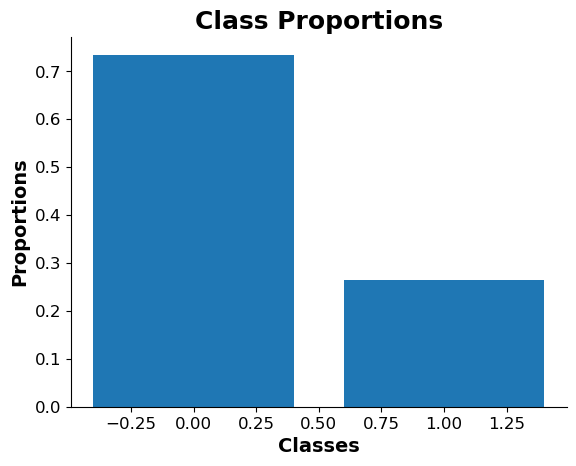

In [120]:
# Create bar chart
fig, ax = plt.subplots()
ax.bar(class_props.index, class_props.values)

# Add labels and formatting
ax.set_xlabel('Classes', fontsize=14, fontweight='bold')
ax.set_ylabel('Proportions', fontsize=14, fontweight='bold')
ax.set_title('Class Proportions', fontsize=18, fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [ ]:
## Build the model and fit

In [123]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            missing=0,
                            seed=42,
                            ## the next two arguments set up early stopping:
                            eval_metric='aucpr',
                            early_stopping_rounds=10)

In [155]:
clf_xgb.fit(X_train, 
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])
# get the evaluation scores during the training process
results = clf_xgb.evals_result()

# get the index of the iteration with the highest AUC score
best_iteration = results['validation_0']['aucpr'].index(max(results['validation_0']['aucpr']))

# print the best AUC score and the corresponding iteration number
print("Best AUC: {:.5f} at iteration {}".format(results['validation_0']['aucpr'][best_iteration], best_iteration))

[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64414
[2]	validation_0-aucpr:0.65129
[3]	validation_0-aucpr:0.65054
[4]	validation_0-aucpr:0.65323
[5]	validation_0-aucpr:0.64855
[6]	validation_0-aucpr:0.65460
[7]	validation_0-aucpr:0.65896
[8]	validation_0-aucpr:0.65746
[9]	validation_0-aucpr:0.65851
[10]	validation_0-aucpr:0.66217
[11]	validation_0-aucpr:0.66528
[12]	validation_0-aucpr:0.66322
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66001
[15]	validation_0-aucpr:0.66028
[16]	validation_0-aucpr:0.65781
[17]	validation_0-aucpr:0.65590
[18]	validation_0-aucpr:0.65735
[19]	validation_0-aucpr:0.65857
[20]	validation_0-aucpr:0.65896
Best AUC: 0.66528 at iteration 11


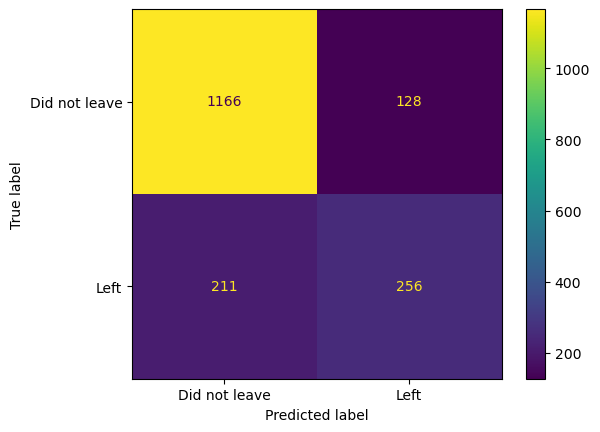

In [125]:
ConfusionMatrixDisplay.from_estimator(clf_xgb,
                                      X_test,
                                      y_test,
                                      values_format='d',
                                      display_labels=["Did not leave", "Left"])

In [ ]:
## Optimize Parameters using Cross Validation and GridSearch()

In [ ]:
## GridSearch

In [132]:
# Define the hyperparameter grid
#param_grid = {
     #'max_depth': [3, 4, 5],
     #'learning_rate': [1, 0.5, 0.1, 0.01, 0.05],
     #'gamma': [0, 0.25, 1.0],
     #'reg_lambda': [0, 1.0, 10.0, 20, 100],
     #'scale_pos_weight': [1, 3, 5]}  # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)#

In [163]:
# # ROUND 1
param_grid = {
     'max_depth': [3, 4, 5],
     'learning_rate': [0.1, 0.01, 0.05],
     'gamma': [0, 0.25, 1.0],
     'reg_lambda': [0, 1.0, 10.0],
     'scale_pos_weight': [1, 3, 5]}

#Best hyperparameters: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 1}
#Mean cross-validated score: 0.8670435614746351

In [172]:
#ROUND 2
param_grid2 = {
     'max_depth': [4],
     'learning_rate': [0.1, 0.5, 1],
     'gamma': [0.25],
     'reg_lambda': [10.0, 20, 100],
      'scale_pos_weight': [1] }

#Best hyperparameters: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 1}
#Mean cross-validated score: 0.8670435614746351

In [175]:
# Create the XGBoost classifier
xgb = xgb.XGBClassifier(objective='binary:logistic', 
                               eval_metric="logloss", ## this avoids a warning...
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5)

In [176]:
# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid2,
    cv= 3,                           #KFold(n_splits=5, shuffle=True),
    scoring='roc_auc',
    verbose=0,
    n_jobs = 10)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train, 
                early_stopping_rounds=10,
                eval_set=[(X_test, y_test)],
                verbose=False)

# Print the best hyperparameters and mean cross-validated score
print("Best hyperparameters:", grid_search.best_params_)
print("Mean cross-validated score:", grid_search.best_score_)

C:\Users\jongb\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best hyperparameters: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 1}
Mean cross-validated score: 0.8670435614746351


In [ ]:
###Building, Evaluating, Drawing, and Interpreting the Optimized XGBoost Model

In [179]:
cl_xgb = xgb.XGBClassifier(seed=42,
                        missing=0,
                        objective='binary:logistic',
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=4,
                        reg_lambda=10.0,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        early_stopping_rounds=10,
                        eval_metric='aucpr')

In [180]:
cl_xgb.fit(X_train, 
            y_train, 
            verbose=True, 
            eval_set=[(X_test, y_test)])

# get the evaluation scores during the training process
results = cl_xgb.evals_result()

# get the index of the iteration with the highest AUC score
best_iteration = results['validation_0']['aucpr'].index(max(results['validation_0']['aucpr']))

# print the best AUC score and the corresponding iteration number
print("Best AUC: {:.5f} at iteration {}".format(results['validation_0']['aucpr'][best_iteration], best_iteration))

[0]	validation_0-aucpr:0.60603
[1]	validation_0-aucpr:0.61589
[2]	validation_0-aucpr:0.63881
[3]	validation_0-aucpr:0.63908
[4]	validation_0-aucpr:0.64600
[5]	validation_0-aucpr:0.64793
[6]	validation_0-aucpr:0.64141
[7]	validation_0-aucpr:0.63817
[8]	validation_0-aucpr:0.63984
[9]	validation_0-aucpr:0.64287
[10]	validation_0-aucpr:0.64712
[11]	validation_0-aucpr:0.64903
[12]	validation_0-aucpr:0.64833
[13]	validation_0-aucpr:0.64999
[14]	validation_0-aucpr:0.65039
[15]	validation_0-aucpr:0.65048
[16]	validation_0-aucpr:0.64924
[17]	validation_0-aucpr:0.64730
[18]	validation_0-aucpr:0.65086
[19]	validation_0-aucpr:0.65332
[20]	validation_0-aucpr:0.65342
[21]	validation_0-aucpr:0.65447
[22]	validation_0-aucpr:0.65330
[23]	validation_0-aucpr:0.65343
[24]	validation_0-aucpr:0.65414
[25]	validation_0-aucpr:0.65662
[26]	validation_0-aucpr:0.65614
[27]	validation_0-aucpr:0.65692
[28]	validation_0-aucpr:0.65806
[29]	validation_0-aucpr:0.66029
[30]	validation_0-aucpr:0.66079
[31]	validation_0-

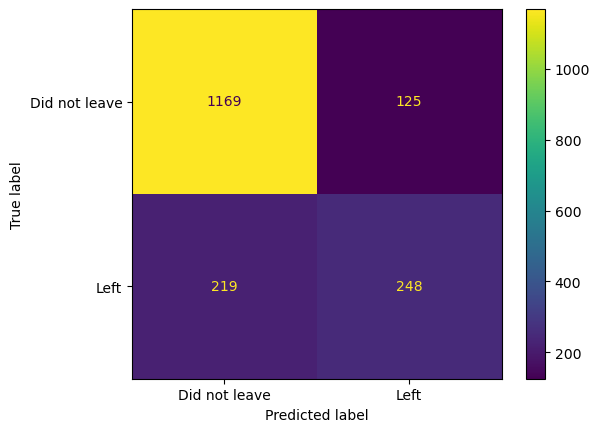

In [181]:
ConfusionMatrixDisplay.from_estimator(cl_xgb,
                                      X_test,
                                      y_test,
                                      values_format='d',
                                      display_labels=["Did not leave", "Left"])


In [183]:
!pip install shap
import shap

     -------------------------------------- 435.6/435.6 kB 3.9 MB/s eta 0:00:00


In [197]:
explainer = shap.Explainer(cl_xgb, X_train, feature_perturbation='interventional')
shap_values = explainer(X_test)

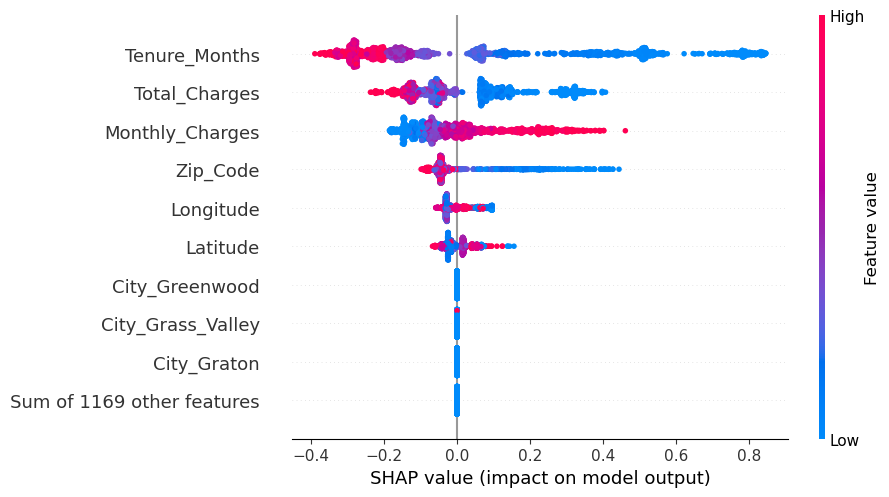

In [198]:
shap.plots.beeswarm(shap_values)